In [17]:
library(dplyr)

data <- read.csv("Motif_MFE_FC_sk.csv")
#print(head(data))

# change Inf into NA and remove NA
data[sapply(data, is.infinite)] <- NA
df <- na.omit(data)
dim(df)

[1] 11527     5

In [18]:
# Select specific columns for SK
df_sk <- df[, c("log2FoldChange", "AT_content", "MFE")]

# Normal correlation
sk_cor <- cor(df_sk)
print(sk_cor)

               log2FoldChange AT_content        MFE
log2FoldChange      1.0000000 -0.4850517 -0.4528021
AT_content         -0.4850517  1.0000000  0.8641330
MFE                -0.4528021  0.8641330  1.0000000


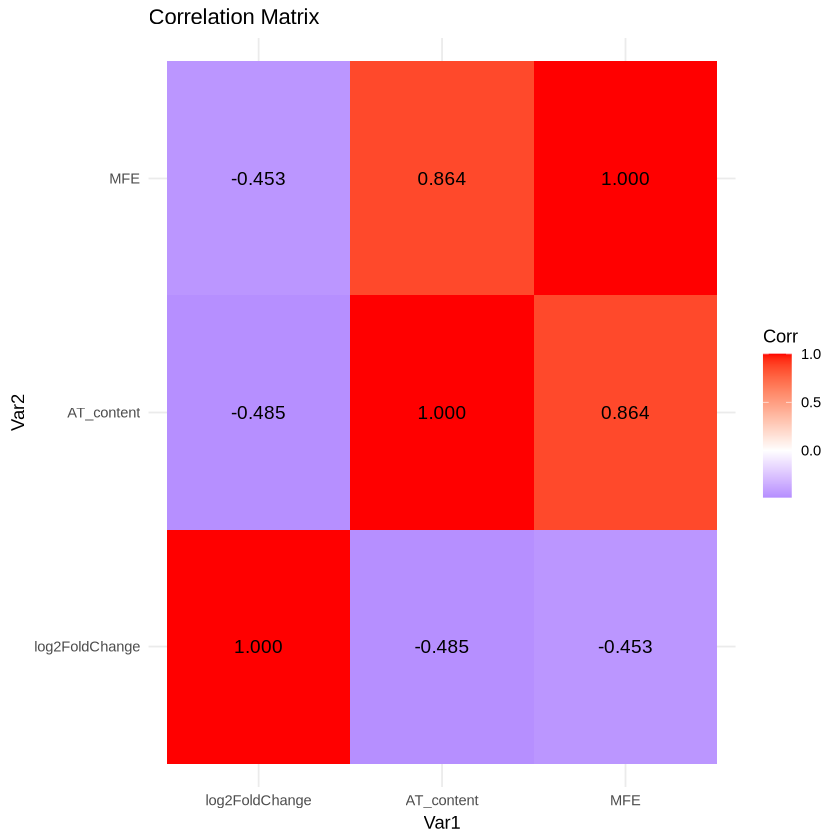

In [19]:
# draw heatmap
library(ggplot2)
library(reshape2)

melted_cor <- melt(sk_cor)

# Plot the heatmap of the correlation matrix with labels
ggplot(data = melted_cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  geom_text(aes(label = sprintf("%.3f", value)), color = "black", size = 4) +  # Add labels with 3 decimal places
  theme_minimal() +
  labs(title = "Correlation Matrix", fill = "Corr") +
  theme(axis.title.x = element_text(angle = 0, vjust = 0.5),
        axis.title.y = element_text(angle = 90, vjust = 0.5))

In [20]:
# Partial correlation
library(ppcor)
pcor(df_sk)

,log2FoldChange,AT_content,MFE
log2FoldChange,1.00000000,-0.2089754,-0.07646718
AT_content,-0.20897535,1.0000000,0.82659974
MFE,-0.07646718,0.8265997,1.00000000
,log2FoldChange,AT_content,MFE
log2FoldChange,0.000000e+00,6.462663e-114,2.024825e-16
AT_content,6.462663e-114,0.000000e+00,0.000000e+00
MFE,2.024825e-16,0.000000e+00,0.000000e+00
,log2FoldChange,AT_content,MFE
log2FoldChange,0.000000,-22.93998,-8.232848
AT_content,-22.939976,0.00000,157.670453


               log2FoldChange AT_content         MFE
log2FoldChange     1.00000000 -0.2089754 -0.07646718
AT_content        -0.20897535  1.0000000  0.82659974
MFE               -0.07646718  0.8265997  1.00000000


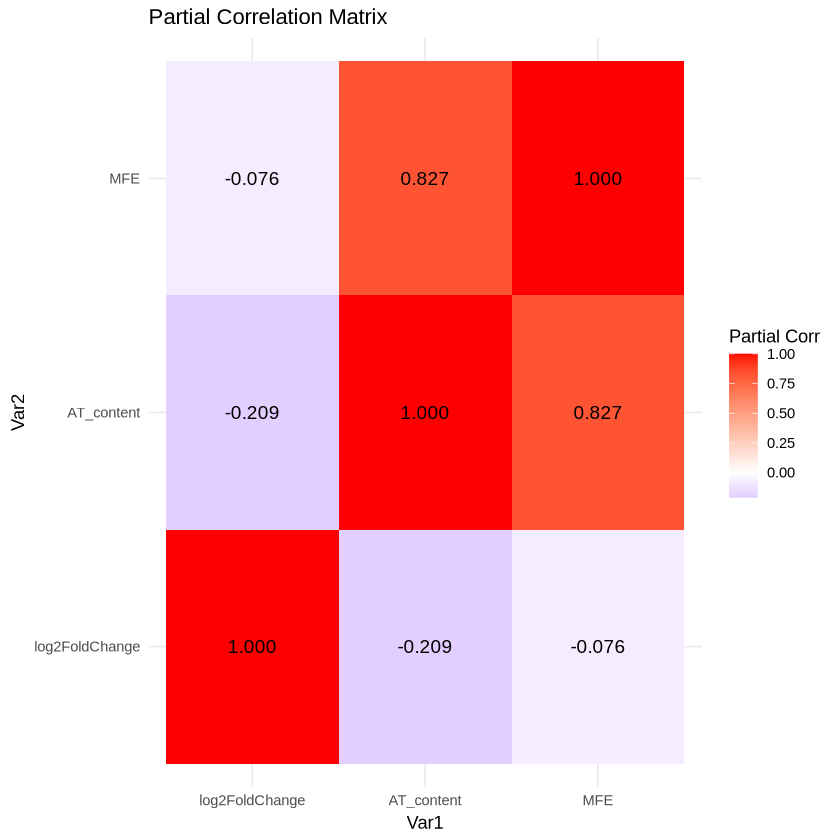

In [21]:
library(reshape2)
library(ppcor)
library(ggplot2)

# Compute the partial correlation matrix
result <- pcor(df_sk)
print(result$estimate)  # Print the partial correlation estimates

# Convert the matrix to a long format for plotting
melted_cor <- melt(result$estimate)

# Plot the heatmap of the partial correlation matrix with labels
ggplot(data = melted_cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  geom_text(aes(label = sprintf("%.3f", value)), color = "black", size = 4) +  # Add labels with 3 decimal places
  theme_minimal() +
  labs(title = "Partial Correlation Matrix", fill = "Partial Corr") +
  theme(axis.title.x = element_text(angle = 0, vjust = 0.5),
        axis.title.y = element_text(angle = 90, vjust = 0.5))

In [22]:
print(melted_cor)

            Var1           Var2       value
1 log2FoldChange log2FoldChange  1.00000000
2     AT_content log2FoldChange -0.20897535
3            MFE log2FoldChange -0.07646718
4 log2FoldChange     AT_content -0.20897535
5     AT_content     AT_content  1.00000000
6            MFE     AT_content  0.82659974
7 log2FoldChange            MFE -0.07646718
8     AT_content            MFE  0.82659974
9            MFE            MFE  1.00000000


# Use deseq2 log2FC as RD_ratio

In [23]:
library(dplyr)

data <- read.csv("new_ratio_MFE.csv")

#select data
# select specific columns
df_hek <- select(df, c("log2FC_hek", "GC_content", "MFE"))
df_sk <- select(df, c("log2FC_sk", "GC_content", "MFE"))


Warning message in file(file, "rt"):
“cannot open file 'new_ratio_MFE.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


           log2FC_hek GC_content        MFE
log2FC_hek  1.0000000  0.5290803 -0.4459523
GC_content  0.5290803  1.0000000 -0.8663944
MFE        -0.4459523 -0.8663944  1.0000000
            log2FC_sk GC_content        MFE
log2FC_sk   1.0000000  0.4704004 -0.4298663
GC_content  0.4704004  1.0000000 -0.8663944
MFE        -0.4298663 -0.8663944  1.0000000


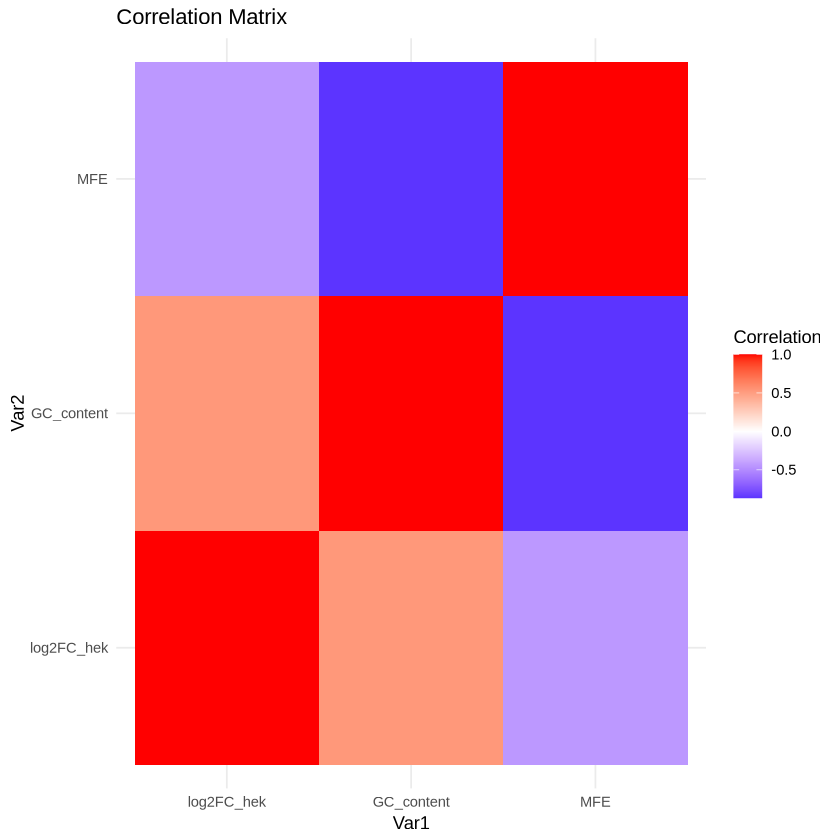

In [28]:
# Normal correlation
hek_cor <- cor(df_hek)
sk_cor <- cor(df_sk)

print(hek_cor)
print(sk_cor)

# draw heatmap
library(ggplot2)
library(reshape2)

melted_cor <- melt(hek_cor)

# Plot the heatmap of the correlation matrix
ggplot(data = melted_cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  theme_minimal() +
  labs(title = "Correlation Matrix", fill = "Correlation") +
  theme(axis.title.x = element_text(angle = 0, vjust = 0.5),
        axis.title.y = element_text(angle = 90, vjust = 0.5))

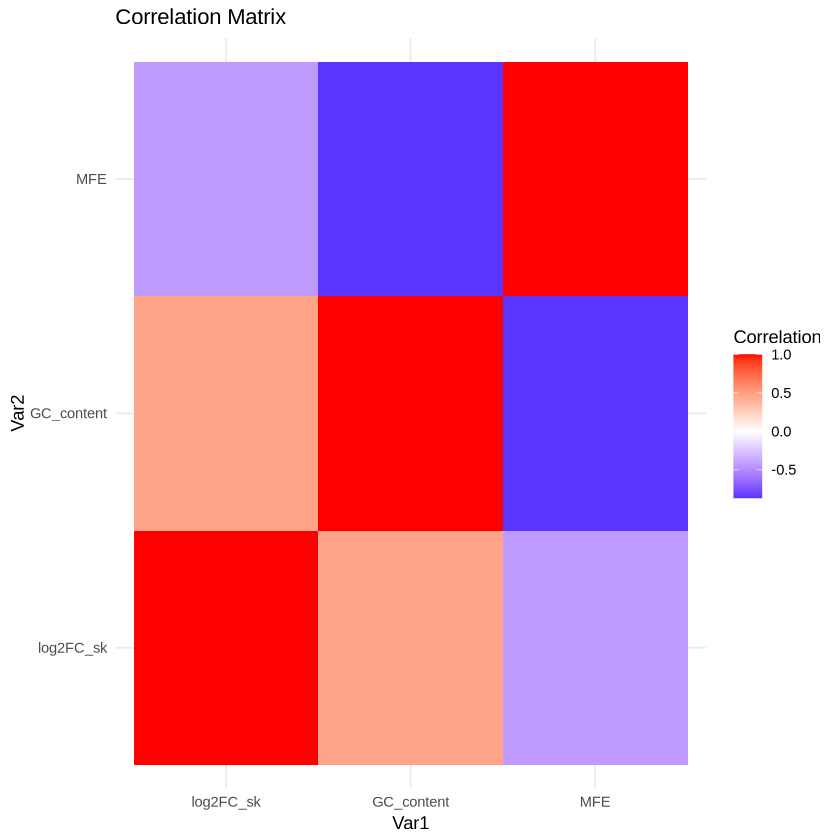

In [29]:
# draw heatmap
library(ggplot2)
library(reshape2)

melted_cor <- melt(sk_cor)

# Plot the heatmap of the correlation matrix
ggplot(data = melted_cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  theme_minimal() +
  labs(title = "Correlation Matrix", fill = "Correlation") +
  theme(axis.title.x = element_text(angle = 0, vjust = 0.5),
        axis.title.y = element_text(angle = 90, vjust = 0.5))

           log2FC_hek GC_content         MFE
log2FC_hek 1.00000000  0.3192928  0.02935737
GC_content 0.31929283  1.0000000 -0.83006366
MFE        0.02935737 -0.8300637  1.00000000


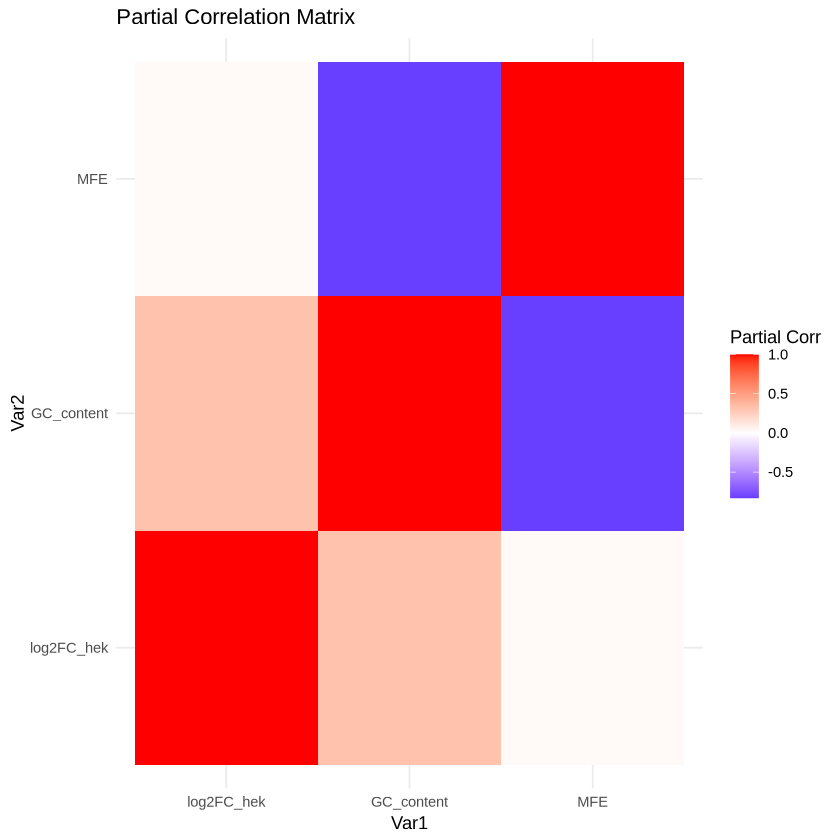

In [30]:
# partial correlation based on log2FC

library(reshape2)
library(ppcor)
library(ggplot2)

# Compute the partial correlation matrix
result <- pcor(df_hek)
print(result$estimate)  # Print the partial correlation estimates

# Convert the matrix to a long format for plotting
melted_cor <- melt(result$estimate)

# Plot the heatmap of the partial correlation matrix
ggplot(data = melted_cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  theme_minimal() +
  labs(title = "Partial Correlation Matrix", fill = "Partial Corr") +
  theme(axis.title.x = element_text(angle = 0, vjust = 0.5),
        axis.title.y = element_text(angle = 90, vjust = 0.5))

             log2FC_sk GC_content         MFE
log2FC_sk   1.00000000  0.2172841 -0.05063759
GC_content  0.21728410  1.0000000 -0.83360717
MFE        -0.05063759 -0.8336072  1.00000000


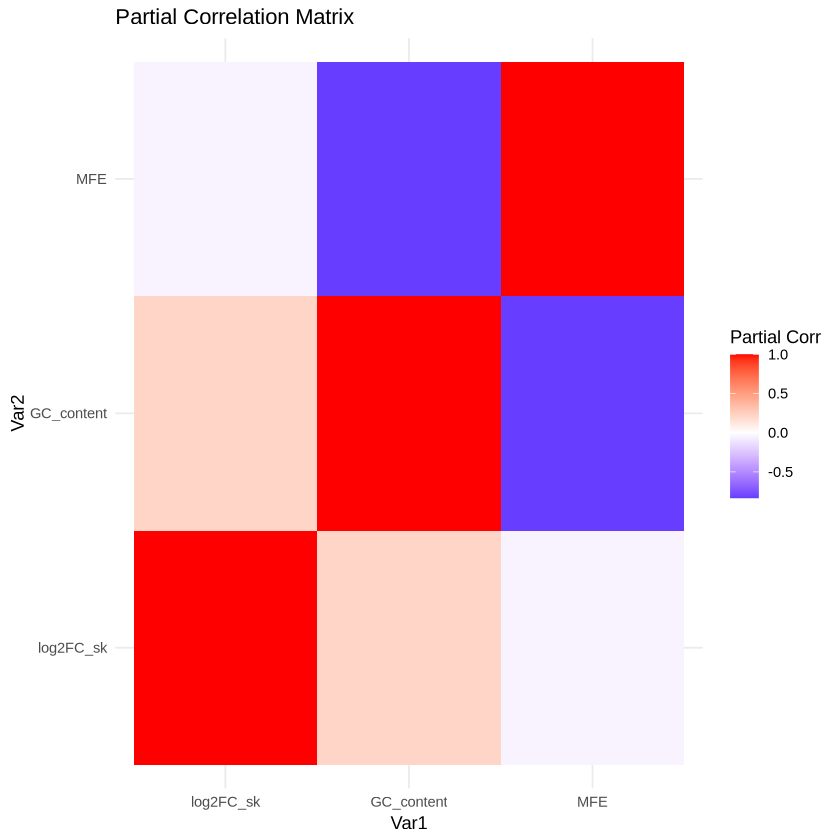

In [33]:
library(reshape2)
library(ppcor)
library(ggplot2)

# Compute the partial correlation matrix
result <- pcor(df_sk)
print(result$estimate)  # Print the partial correlation estimates

# Convert the matrix to a long format for plotting
melted_cor <- melt(result$estimate)

# Plot the heatmap of the partial correlation matrix
ggplot(data = melted_cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  theme_minimal() +
  labs(title = "Partial Correlation Matrix", fill = "Partial Corr") +
  theme(axis.title.x = element_text(angle = 0, vjust = 0.5),
        axis.title.y = element_text(angle = 90, vjust = 0.5))

In [1]:
library(dplyr)

data <- read.csv("/home/yg2895/media/protein/yg2895/ASO-lib-20250102/RBP/motif_log2FC_sk.csv")
#print(head(data))

# change Inf into NA and remove NA
data[sapply(data, is.infinite)] <- NA
df <- na.omit(data)
dim(df)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 5343    7

               log2FoldChange Motif_Score        MFE GC_content
log2FoldChange      1.0000000  -0.3077037 -0.3961199  0.4205424
Motif_Score        -0.3077037   1.0000000  0.4399332 -0.5181339
MFE                -0.3961199   0.4399332  1.0000000 -0.8800611
GC_content          0.4205424  -0.5181339 -0.8800611  1.0000000


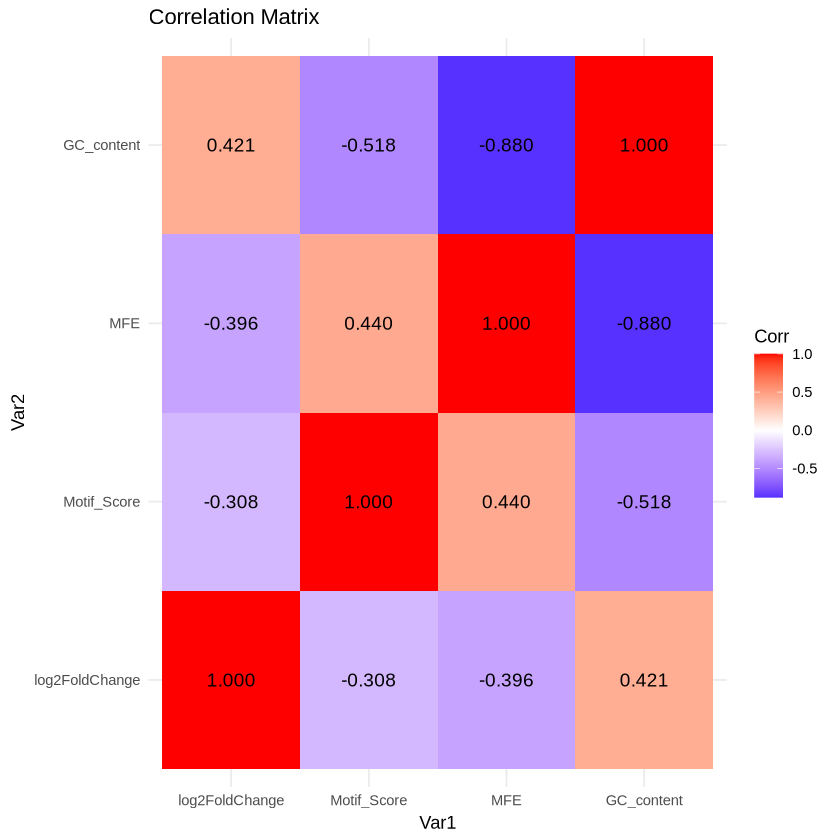

In [2]:
# Select specific columns for SK
df_sk <- df[, c("log2FoldChange", "Motif_Score", "MFE", "GC_content")]

# Normal correlation
sk_cor <- cor(df_sk)
print(sk_cor)

# draw heatmap
library(ggplot2)
library(reshape2)

melted_cor <- melt(sk_cor)

# Plot the heatmap of the correlation matrix with labels
ggplot(data = melted_cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  geom_text(aes(label = sprintf("%.3f", value)), color = "black", size = 4) +  # Add labels with 3 decimal places
  theme_minimal() +
  labs(title = "Correlation Matrix", fill = "Corr") +
  theme(axis.title.x = element_text(angle = 0, vjust = 0.5),
        axis.title.y = element_text(angle = 90, vjust = 0.5))

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




,log2FoldChange,Motif_Score,MFE,GC_content
log2FoldChange,1.00000000,-0.11842733,-0.06545398,0.1227496
Motif_Score,-0.11842733,1.00000000,-0.04692214,-0.2881104
MFE,-0.06545398,-0.04692214,1.00000000,-0.8327545
GC_content,0.12274961,-0.28811039,-0.83275454,1.0000000
,log2FoldChange,Motif_Score,MFE,GC_content
log2FoldChange,0.000000e+00,3.838741e-18,1.688451e-06,2.200962e-19
Motif_Score,3.838741e-18,0.000000e+00,6.030088e-04,1.297404e-102
MFE,1.688451e-06,6.030088e-04,0.000000e+00,0.000000e+00
GC_content,2.200962e-19,1.297404e-102,0.000000e+00,0.000000e+00
,log2FoldChange,Motif_Score,MFE,GC_content


               log2FoldChange Motif_Score         MFE GC_content
log2FoldChange     1.00000000 -0.11842733 -0.06545398  0.1227496
Motif_Score       -0.11842733  1.00000000 -0.04692214 -0.2881104
MFE               -0.06545398 -0.04692214  1.00000000 -0.8327545
GC_content         0.12274961 -0.28811039 -0.83275454  1.0000000


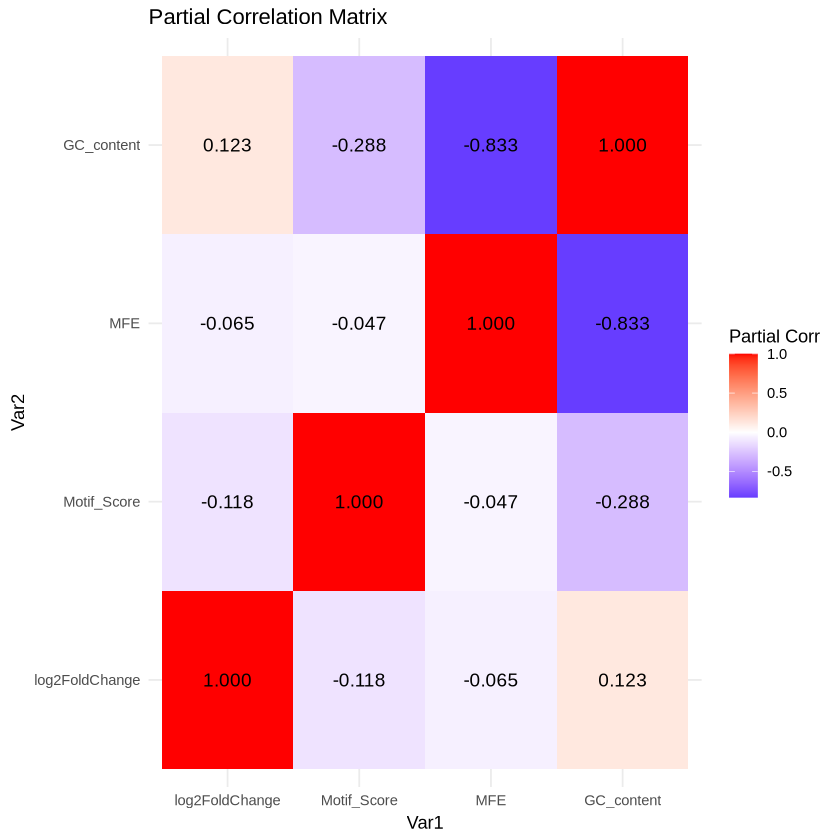

In [3]:
# Partial correlation
library(ppcor)
pcor(df_sk)

library(reshape2)
library(ppcor)
library(ggplot2)

# Compute the partial correlation matrix
result <- pcor(df_sk)
print(result$estimate)  # Print the partial correlation estimates

# Convert the matrix to a long format for plotting
melted_cor <- melt(result$estimate)

# Plot the heatmap of the partial correlation matrix with labels
ggplot(data = melted_cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  geom_text(aes(label = sprintf("%.3f", value)), color = "black", size = 4) +  # Add labels with 3 decimal places
  theme_minimal() +
  labs(title = "Partial Correlation Matrix", fill = "Partial Corr") +
  theme(axis.title.x = element_text(angle = 0, vjust = 0.5),
        axis.title.y = element_text(angle = 90, vjust = 0.5))